In [1]:
import numpy as np, plottools as pl, healpy as hp, local, tools_cmb, binning as bn
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_cmb_aps(aobj,cn):
    mb = bn.multipole_binning(70,lmin=100,lmax=2000)
    if cn in [3,6]:
        lfac = np.ones(aobj.lmax+1)
    else:
        lfac = aobj.lfac
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj.fcmb.cl['c'],cn=cn,lfac=lfac)
    mnb, vnb, snb = bn.binned_spec(mb,aobj.fcmb.cl['n'],cn=cn,lfac=lfac,doreal=False)
    if cn==1: ymin, ymax = 0, 8e-10
    if cn==2: ymin, ymax = -1e-12, 6e-12
    if cn==3: ymin, ymax = -1e-18, 5e-18
    if cn==4: ymin, ymax = -2e-11, 2e-11
    if cn==5: ymin, ymax = -1e-12, 1e-12
    if cn==6: ymin, ymax = -2e-18, 2e-18
    pl.plot_1dstyle(fsize=[12,5],xmin=mb.lmin,xmax=mb.lmax,ymin=ymin,ymax=ymax)
    errorbar(mb.bc,ocb-mnb,yerr=vcb,fmt='o',label='data')
    plot(mb.bc,mcb-mnb,label='sim')
    if cn == 2:
        plot(aobj.l,lfac*.1*2*(aobj.sigma)**2*aobj.ibl**2,label='white noise x 0.1',color='g',ls='--')
        plot(mb.bc,mnb*.1,label='noise sim x 0.1')
    elif cn == 3:
        plot(aobj.l,.01*2*(aobj.sigma)**2*aobj.ibl**2,label='white noise x 0.01',color='g',ls='--')
        plot(mb.bc,mnb*.01,label='noise sim x 0.01')
    else:
        if cn==1: plot(aobj.l,lfac*(aobj.sigma)**2*aobj.ibl**2,label='white noise',color='g',ls='--')
        plot(mb.bc,mnb,label='noise sim')
    if cn<=4: plot(aobj.l,lfac*aobj.lcl[cn-1,:],label='theory',color='k',ls='--')
    legend()
    show()

In [3]:
aobj = local.init_analysis(freq='smica',dtype='full',wind='LG60')

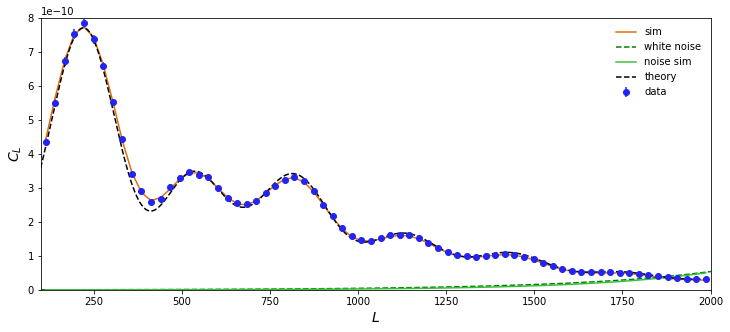

In [4]:
plot_cmb_aps(aobj,1)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


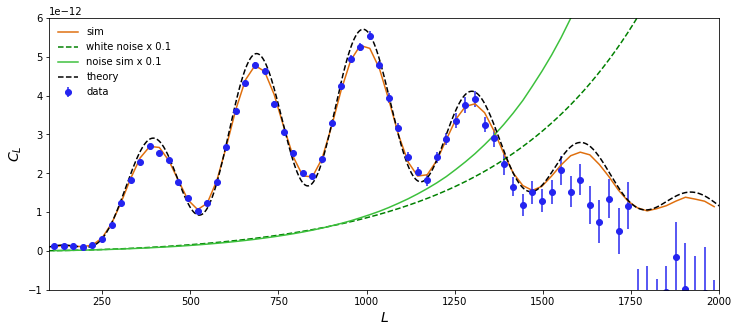

In [5]:
plot_cmb_aps(aobj,2)

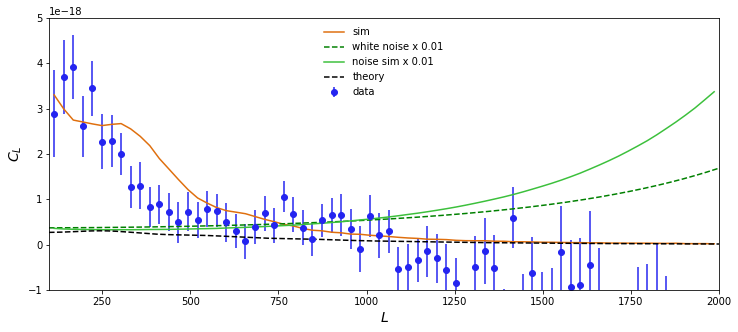

In [6]:
plot_cmb_aps(aobj,3)

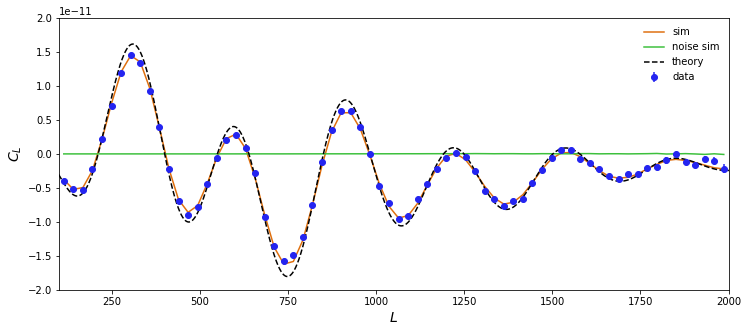

In [7]:
plot_cmb_aps(aobj,4)

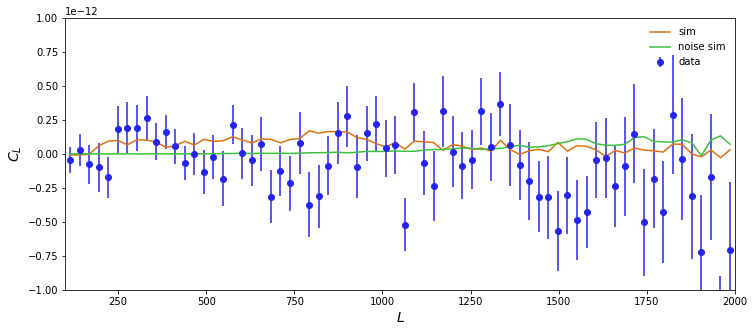

In [8]:
plot_cmb_aps(aobj,5)

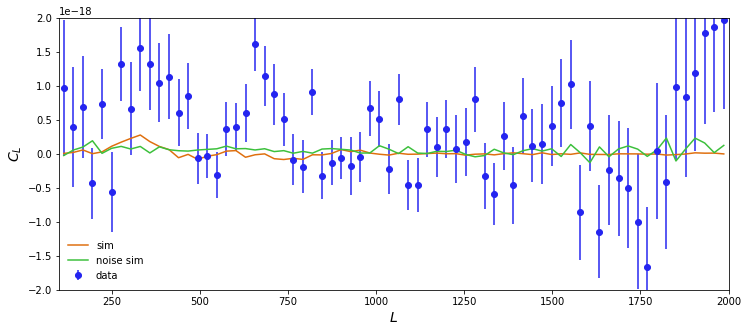

In [9]:
plot_cmb_aps(aobj,6)